In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [32]:
data=pd.read_csv('/home/piyush/Downloads/IOSD/tennis.csv')
data.head

<bound method NDFrame.head of     Day   Outlook Temperature Humidity    Wind PlayTennis
0    D1     Sunny         Hot     High    Weak         No
1    D2     Sunny         Hot     High  Strong         No
2    D3  Overcast         Hot     High    Weak        Yes
3    D4      Rain        Mild     High    Weak        Yes
4    D5      Rain        Cool   Normal    Weak        Yes
5    D6      Rain        Cool   Normal  Strong         No
6    D7  Overcast        Cool   Normal  Strong        Yes
7    D8     Sunny        Mild     High    Weak         No
8    D9     Sunny        Cool   Normal    Weak        Yes
9   D10      Rain        Mild   Normal    Weak        Yes
10  D11     Sunny        Mild   Normal  Strong        Yes
11  D12  Overcast        Mild     High  Strong        Yes
12  D13  Overcast         Hot   Normal    Weak        Yes
13  D14      Rain        Mild     High  Strong         No
14  D15     Sunny        Cool     High  Strong         No>

In [3]:
data.describe()

,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
count,15,15,15,15,15,15
unique,15,3,3,2,2,2
top,D10,Sunny,Mild,High,Weak,Yes
freq,1,6,6,8,8,9


In [4]:
data[:5]

,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes


In [5]:
data['Day'].values

array(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11',
       'D12', 'D13', 'D14', 'D15'], dtype=object)

In [6]:
data['Outlook'].value_counts()

Sunny       6
Rain        5
Overcast    4
Name: Outlook, dtype: int64

In [7]:
data['Temperature'].unique()

array(['Hot', 'Mild', 'Cool'], dtype=object)

In [8]:
data['Wind'].unique()

array(['Weak', 'Strong'], dtype=object)

In [9]:
cross=pd.crosstab(data.Temperature,data.PlayTennis)

<BarContainer object of 15 artists>

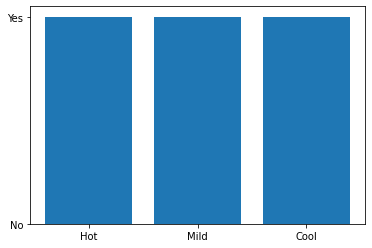

In [10]:
plt.bar(data.Temperature,data.PlayTennis)

In [11]:
cross

PlayTennis,No,Yes
Temperature,,
Cool,2,3
Hot,2,2
Mild,2,4


In [21]:
cross2=pd.crosstab(data.Humidity,data.PlayTennis)

In [22]:
cross3=pd.crosstab(data.Wind,data.PlayTennis)

In [23]:
cross4=pd.crosstab(data.Outlook,data.PlayTennis)

In [24]:
cross5=pd.crosstab(data.Day,data.PlayTennis)

In [16]:
data

,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


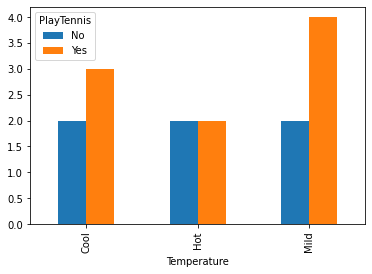

In [20]:
cross.plot.bar()
plt.legend(title='PlayTennis')
plt.show()

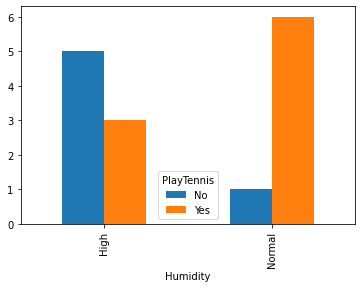

In [25]:
cross2.plot.bar()
plt.legend(title='PlayTennis')
plt.show()

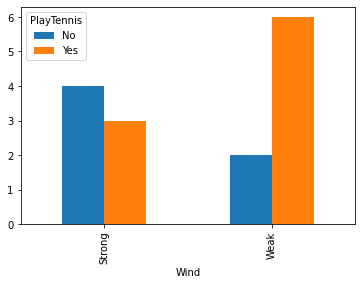

In [26]:
cross3.plot.bar()
plt.legend(title='PlayTennis')
plt.show()

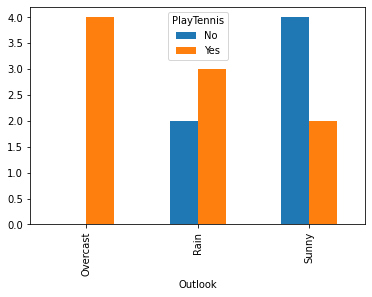

In [27]:
cross4.plot.bar()
plt.legend(title='PlayTennis')
plt.show()

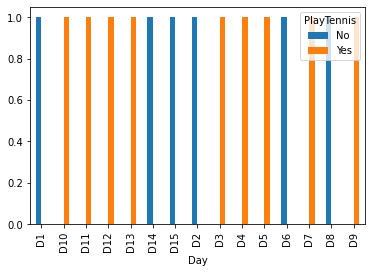

In [28]:
cross5.plot.bar()
plt.legend(title='PlayTennis')
plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data1=data.apply(encoder.fit_transform)

In [43]:
data1

,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,2,1,0,1,0
1,7,2,1,0,0,0
2,8,0,1,0,1,1
3,9,1,2,0,1,1
4,10,1,0,1,1,1
5,11,1,0,1,0,0
6,12,0,0,1,0,1
7,13,2,2,0,1,0
8,14,2,0,1,1,1
9,1,1,2,1,1,1


<AxesSubplot:>

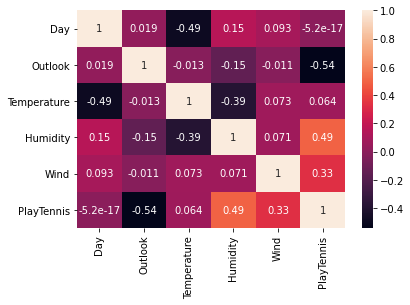

In [36]:
sns.heatmap(data1.corr(),annot=True)

In [44]:
X=data1.drop(['Day','Temperature','PlayTennis'],axis=1)
print(X)

    Outlook  Humidity  Wind
0         2         0     1
1         2         0     0
2         0         0     1
3         1         0     1
4         1         1     1
5         1         1     0
6         0         1     0
7         2         0     1
8         2         1     1
9         1         1     1
10        2         1     0
11        0         0     0
12        0         1     1
13        1         0     0
14        2         0     0


In [45]:
y=data1.PlayTennis
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
14    0
Name: PlayTennis, dtype: int64

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
pipe1=Pipeline([('lr',LogisticRegression())])
pipe2=Pipeline([('RFC',RandomForestClassifier())])
pipe3=Pipeline([('nb',GaussianNB())])
pipe4=Pipeline([('knn',KNeighborsClassifier(n_neighbors=3))])
pipe5=Pipeline([('dtc',DecisionTreeClassifier())])

In [55]:
pipe1.fit(X_train,y_train)
pipe2.fit(X_train,y_train)
pipe3.fit(X_train,y_train)
pipe4.fit(X_train,y_train)
pipe5.fit(X_train,y_train)

Pipeline(steps=[('dtc', DecisionTreeClassifier())])

In [56]:
pipe1.score(X_test,y_test)

1.0

In [57]:
pipe2.score(X_test,y_test)

1.0

In [58]:
pipe3.score(X_test,y_test)

1.0

In [59]:
pipe4.score(X_test,y_test)

1.0

In [60]:
pipe5.score(X_test,y_test)

0.6666666666666666

In [ ]:
iris 98 , hsb2- 82lr , tennis-78, 75, wine quality- 